In [2]:
import numpy as np 

In [4]:
import matplotlib.pyplot as plt 

In [8]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten


In [10]:
from tensorflow.keras.datasets import mnist


In [12]:
from tensorflow.keras.models import Model 

In [14]:
# LOAD THE DATASET

In [20]:
(x_train,_),(x_test,_)=mnist.load_data()

In [22]:
x_test.shape

(10000, 28, 28)

In [24]:
# reshape x_test and x_train

In [26]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

In [28]:
x_train.shape

(60000, 784)

In [30]:
# convert into float 
x_train=x_train.astype('float')/255
x_test=x_test.astype('float')/255

In [32]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [34]:
# vanilla autoencoder 
# parameters= 
input_size=784
hidden_size=64
output_size=784

In [36]:
from tensorflow.keras.layers import Input

In [40]:
# functional api
x=Input(shape=(input_size,))
h=Dense(hidden_size,activation='relu')(x)
r=Dense(output_size,activation='sigmoid')(h)

ae_model=Model(inputs=x,outputs=r)

In [42]:
ae_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,200 (395.31 KB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
ae_model.compile(optimizer='adam',loss='mean_squared_error')

In [52]:
epochs=20
batch_size=128
history=ae_model.fit(x_train,x_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_test,x_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0086 - val_loss: 0.0070
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0069 - val_loss: 0.0059
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0059 - val_loss: 0.0052
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0053 - val_loss: 0.0048
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0049 - val_loss: 0.0046
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0046 - val_loss: 0.0043
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [56]:
#prediction of test data
decoded_imgs=ae_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step


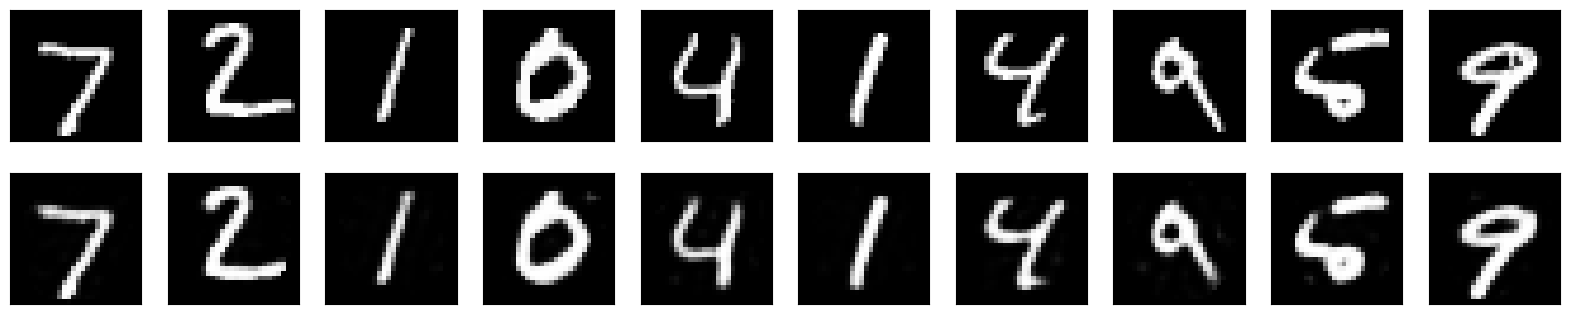

In [60]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()